In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
train = pd.read_csv('../train.csv')

In [4]:
train.columns

Index([u'label', u'clickTime', u'conversionTime', u'creativeID', u'userID',
       u'positionID', u'connectionType', u'telecomsOperator'],
      dtype='object')

In [9]:
train.shape

(3749528, 8)

In [11]:
train.drop_duplicates().shape

(3692105, 8)

In [12]:
3749528-3692105 # 五万多是重复的

57423

In [15]:
def unique_shape(df):
    for c in df.columns:
        print c, df[c].unique().shape

In [16]:
unique_shape(train)

label (2L,)
clickTime (20160L,)
conversionTime (18207L,)
creativeID (6315L,)
userID (2595627L,)
positionID (7219L,)
connectionType (5L,)
telecomsOperator (4L,)


In [17]:
df_ad = pd.read_csv('../ad.csv')

In [19]:
unique_shape(df_ad)

creativeID (6582L,)
adID (3616L,)
camgaignID (720L,)
advertiserID (91L,)
appID (50L,)
appPlatform (2L,)


In [20]:
df_ad_cate = pd.read_csv('../app_categories.csv')

In [22]:
unique_shape(df_ad_cate)

appID (217041L,)
appCategory (28L,)


In [25]:
df_ad.appID.dtype

dtype('int64')

In [26]:
df_installed = pd.read_csv('../user_installedapps.csv')

In [30]:
df_installed.groupby('userID').count().reset_index()

,userID,appID
0,1,79
1,9,3
2,10,97
3,12,38
4,14,62
5,16,60
6,17,90
7,20,106
8,21,49
9,22,35


In [3]:
train.columns

Index([u'label', u'clickTime', u'conversionTime', u'creativeID', u'userID',
       u'positionID', u'connectionType', u'telecomsOperator'],
      dtype='object')

In [ ]:
df =train.groupby(['creativeID']).count()
df = pd.DataFrame(df.rename(columns={'label':'count'})['count'])
df

# 训练样本的点击率很高

,count
creativeID,
1,5
2,4
3,15
4,1
5,7
6,149
7,66
8,4
9,2


In [15]:
df_actions = pd.read_csv('../user_app_actions.csv')

In [16]:
df_actions.head()

,userID,installTime,appID
0,1,182032,933
1,5,141354,589
2,5,251727,565
3,5,260932,596
4,5,261318,536


In [17]:
df_actions['installDay'] = pd.Series(np.floor(df_actions.installTime/10000)).astype(int)

In [18]:
df_actions['installHour'] = pd.Series(np.floor(df_actions.installTime%10000/100)).astype(int)

In [19]:
df_actions['installMinute'] = pd.Series(np.floor(df_actions.installTime%100)).astype(int)

In [20]:
df_actions.head()

,userID,installTime,appID,installDay,installHour,installMinute
0,1,182032,933,18,20,32
1,5,141354,589,14,13,54
2,5,251727,565,25,17,27
3,5,260932,596,26,9,32
4,5,261318,536,26,13,18


In [21]:
df_actions_=df_actions.ix[np.logical_and(df_actions.installHour<17, df_actions.installHour>9),['appID','installDay']]

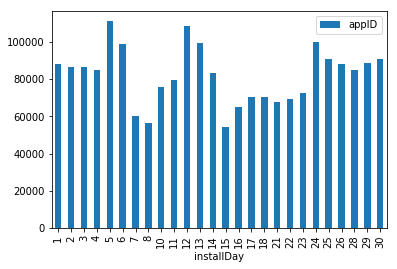

In [25]:
df_actions_.groupby(['installDay']).count().plot(kind='bar')

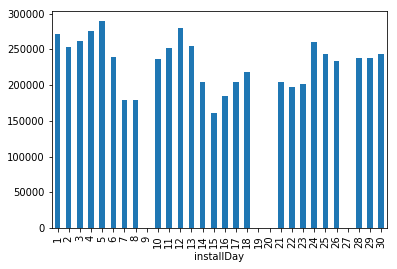

In [26]:
df_actions.groupby(['installDay']).count().appID.plot(kind='bar')

In [27]:
df_actions.groupby(['installDay']).count()

,userID,installTime,appID,installHour,installMinute
installDay,,,,,
1,271157,271157,271157,271157,271157
2,253369,253369,253369,253369,253369
3,261533,261533,261533,261533,261533
4,275050,275050,275050,275050,275050
5,289725,289725,289725,289725,289725
6,238633,238633,238633,238633,238633
7,179691,179691,179691,179691,179691
8,179522,179522,179522,179522,179522
9,9,9,9,9,9


In [29]:
df_actions.head()

,userID,installTime,appID,installDay,installHour,installMinute
0,1,182032,933,18,20,32
1,5,141354,589,14,13,54
2,5,251727,565,25,17,27
3,5,260932,596,26,9,32
4,5,261318,536,26,13,18


In [30]:
df_user = pd.read_csv('../user.csv')

In [31]:
df_actions= pd.merge(df_actions, df_user, on='userID', how='left')

In [38]:
b_morning=np.logical_and(df_actions.installHour>=9,df_actions.installHour<=11)
b_after=np.logical_and(df_actions.installHour>=14,df_actions.installHour<=17)
b_age=np.logical_and(df_actions.age>=18,df_actions.age<=55)
df_actions_=df_actions.ix[np.logical_and(np.logical_or(b_morning,b_after),b_age),['userID','installDay']]

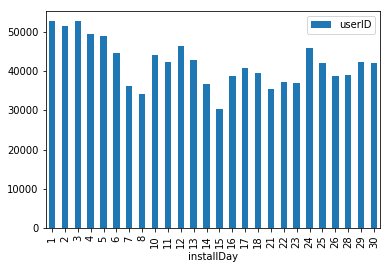

In [43]:
df_actions_.groupby('installDay').count().plot(kind='bar')

In [57]:
df_train=pd.read_csv('../train.csv')

In [58]:
df_train.head()

,label,clickTime,conversionTime,creativeID,userID,positionID,connectionType,telecomsOperator
0,0,170000,NaN,3089,2798058,293,1,1
1,0,170000,NaN,1259,463234,6161,1,2
2,0,170000,NaN,4465,1857485,7434,4,1
3,0,170000,NaN,1004,2038823,977,1,1
4,0,170000,NaN,1887,2015141,3688,1,1


In [59]:
df_train['clickDay']=pd.Series(np.floor(df_train.clickTime/10000)).astype(int)

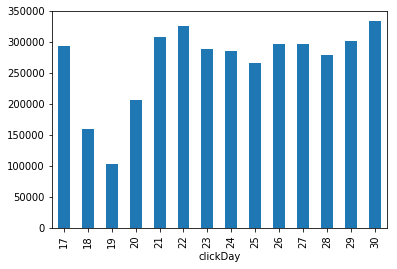

In [61]:
df_train.groupby('clickDay').count().label.plot(kind='bar')

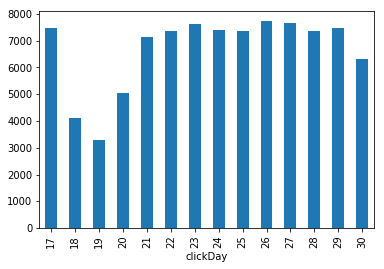

In [62]:
df_train.groupby('clickDay').sum().label.plot(kind='bar')

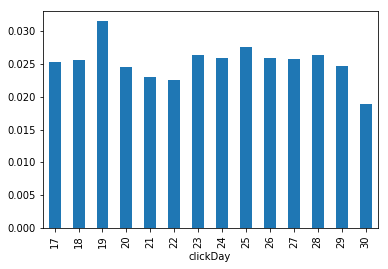

In [64]:
pd.Series(df_train.groupby('clickDay').sum().label/df_train.groupby('clickDay').count().label).plot(kind='bar')

In [57]:
df_train['clickHour']=pd.Series(np.floor(df_train.clickTime%10000/100)).astype(int)

In [58]:
dp=df_train.ix[np.logical_and(df_train.clickHour>11,df_train.clickHour<14),['label','clickDay']]

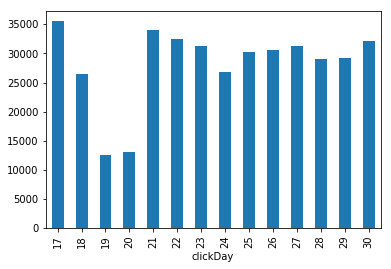

In [61]:
dp.groupby(['clickDay']).count().label.plot(kind='bar')

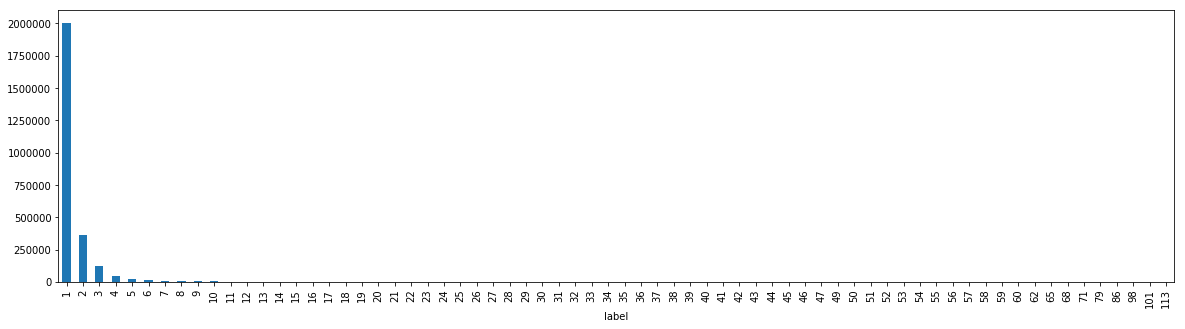

In [30]:
userID = pd.DataFrame(train[['userID','label']]).groupby('userID').count()
userID[userID.label==1].shape[0]/float(userID.shape[0])
userID.reset_index().groupby('label').count().userID.plot(kind='bar', figsize=(20,5))

In [23]:
userID[userID.label==1].shape[0]/float(userID.shape[0])creativeID = pd.DataFrame(train[['creativeID','label']]).groupby('creativeID').count()
creativeID[creativeID.label==1].shape[0]/float(creativeID.shape[0])

0.07030878859857483

In [36]:
cnt_click = userID.reset_index().rename(columns={'label':'count'})
cnt_click.head()

,userID,count
0,1,1
1,2,1
2,4,1
3,5,10
4,6,2


In [39]:
df_cvt = train.ix[:,['userID','label']].groupby('userID').sum().reset_index().rename(columns={'label':'convert'})
df_cvt.head()

,userID,convert
0,1,0
1,2,0
2,4,0
3,5,0
4,6,0


In [49]:
df_merge = pd.merge(cnt_click, df_cvt, how='left',on='userID')
df_merge.head(10)

,userID,count,convert
0,1,1,0
1,2,1,0
2,4,1,0
3,5,10,0
4,6,2,0
5,7,1,0
6,8,1,0
7,9,15,0
8,10,1,0
9,11,1,0


In [52]:
df_df_cnt = pd.merge(train, cnt_click, how='left', on='userID')
df_df_cnt.head()

,label,clickTime,conversionTime,creativeID,userID,positionID,connectionType,telecomsOperator,count
0,0,170000,NaN,3089,2798058,293,1,1,1
1,0,170000,NaN,1259,463234,6161,1,2,3
2,0,170000,NaN,4465,1857485,7434,4,1,2
3,0,170000,NaN,1004,2038823,977,1,1,1
4,0,170000,NaN,1887,2015141,3688,1,1,1


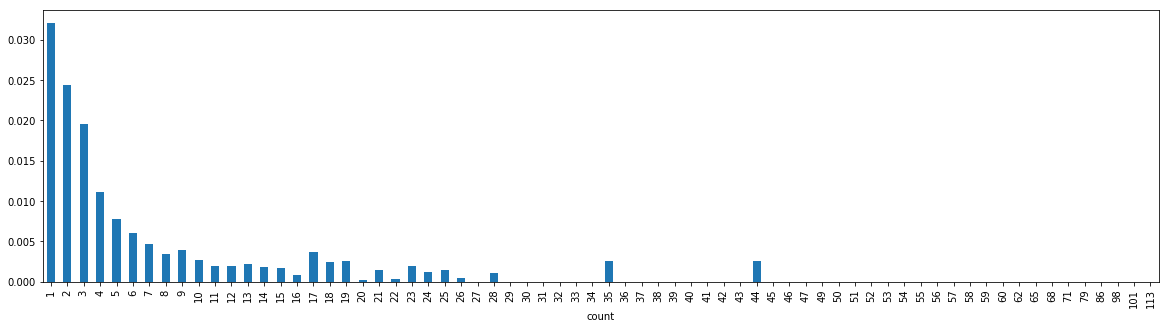

In [56]:
pd.Series(df_df_cnt.groupby('count').sum().label/df_df_cnt.groupby('count').count().label).plot(kind='bar',figsize=(20,5))

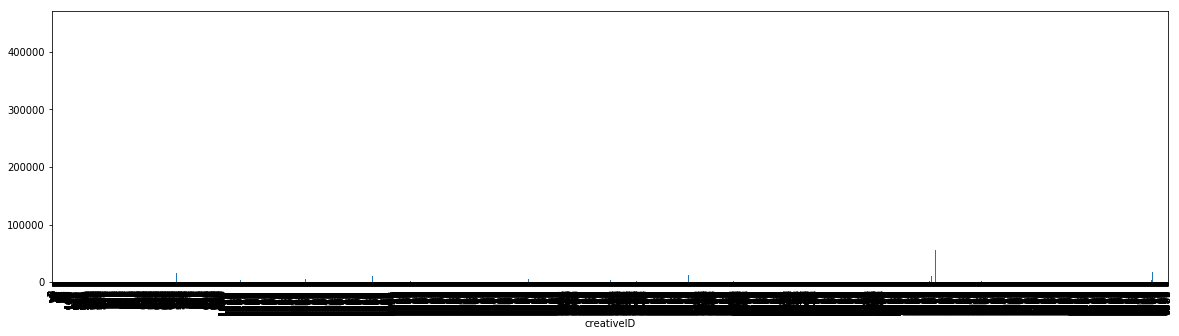

In [68]:
df_train.groupby('creativeID').count().label.plot(kind='bar', figsize=(20,5))

In [1]:
hist = pd.read_csv('hist_features.csv')

NameError: name 'pd' is not defined

In [5]:
train.columns

Index([u'label', u'clickTime', u'conversionTime', u'creativeID', u'userID',
       u'positionID', u'connectionType', u'telecomsOperator'],
      dtype='object')

In [6]:
df_pos = pd.read_csv('../position.csv')

In [7]:
df_mm = pd.merge(train, df_pos, on='positionID', how='left')

In [10]:
df_siteset = df_mm.ix[:,['label', 'sitesetID']]

In [13]:
df_siteset.groupby('sitesetID').sum()/df_siteset.groupby('sitesetID').count()

,label
sitesetID,
0,0.017488
1,0.043858
2,0.024221
